# Проект: Статистический анализ данных
В качестве аналитика сервиса аренды самокатов GoFast необходимо исследоватьданные о некоторых пользователях из нескольких городов, а также об их поездках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.    
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:
- без подписки
    - абонентская плата отсутствует;
    - стоимость одной минуты поездки — 8 рублей;
    - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
    - абонентская плата — 199 рублей в месяц;
    - стоимость одной минуты поездки — 6 рублей;
    - стоимость старта — бесплатно.
    
Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.

## Описание данных
В основных данных есть информация о пользователях, их поездках и подписках, данные представлены разными файлами в формате csv. 

## План работы 
В рамках проекта анализа необходимо сделать следующее: загрузить данные, осуществить предобработку и исследовательский анализ данных, подсчитать выручку и отработать гипотезы.
1. [x] импортировать данные 
2. [x] выполнить предобработку данных: привести столбец date к формату pandas, а также добавить столбец date с номером месяца и обработать пропуски и дубликаты 
3. [x] описать и исследовать следующую информацию: 
    - [x] частота встречаемости городов;
    - [x] соотношение пользователей с подпиской и без подписки;
    - [x] возраст пользователей;
    - [x] расстояние, которое пользователь преодолел за одну поездку;
    - [x] продолжительность поездок.
4. [x] объединить данные: 
    - [x] собрать данные о пользователях, поездках и подписках в один датафрейм
    - [x] создать 2 новых датафрейма: 
        - [x] c данными о пользователях без подписки;
        - [x] с данными о пользователях с подпиской.
     - [x] визуализировать информацию о расстоянии и времени поездок для пользователей обеих категорий.
5. [x] подсчитать выручку: 
    - [x] создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.
    - [x] В этот же датафрейм добавить столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого нужно обратиться к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и  26.0 должны быть преобразованы к 26.
6. [x] Проверить гипотезы
    - [x] Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.
    - [x]  Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.
    - [x] Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.
    - [x] Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?
    
Для начала импортируем библиотеки и загрузим данные. 

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from scipy.stats import binom

#### Шаг 1. Загрузка данных

In [20]:
users_go = pd.read_csv('/datasets/users_go.csv')
print('Информация о пользователях: \n')
display(users_go.head(5))
rides_go = pd.read_csv('/datasets/rides_go.csv')
print('\n\nИнформация о поездках: \n')
display(rides_go.head(5))
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')
print('\n\nИнформация о подписках:')
display(subscriptions_go.head(5))

Информация о пользователях: 



,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra




Информация о поездках: 



,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28




Информация о подписках:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [21]:
# выведем также общую информацию о данных пользователей и поездок. 
# В таблице подписок всего две строки, поэтому без сводной информации о ней можем обойтись
print('Информация о пользователях: \n')
users_go.info()
print('\n\nИнформация о поездках: \n')
rides_go.info()

Информация о пользователях: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Информация о поездках: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Общий вывод по этапу**: Загрузили данные, видим, что нет явных проблем с наименованием столбцов, их преобразование не требуется.  Также видим, что в данных нет пропусков, у нас есть 1565 строк с информацией о пользователях и 18068 строк с информацией о поездках.  
Можем переходить к следующему этапу.

#### Шаг 2. Предобработка данных
На данном этапе необходимо сделать следующее: привести столбец date к формату pandas, а также добавить столбец date с номером месяца и обработать пропуски и дубликаты.    
Начнём с обработки дат.

In [22]:
# преобразуем дату в таблице поездок 
rides_go['date'] = pd.to_datetime(rides_go['date'], format = '%Y-%m-%d')
# добавляем номер месяца в таблицу
rides_go['month'] = rides_go['date'].dt.month
display(rides_go.head(5))

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


C форматом даты разобрались, теперь изучим явные дубликаты и пропуски. 

In [23]:
print('Дубликаты в users_go -', users_go.duplicated().sum())
print('Дубликаты rides_go -', rides_go.duplicated().sum())

Дубликаты в users_go - 31
Дубликаты rides_go - 0


Нет явных дубликатов в rides_go, а в users_go 31 дубликат. Удалим их: 

In [24]:
users_go = users_go.drop_duplicates().reset_index(drop = True)
# проверим, что дубликатов больше нет 
print('Дубликаты в users_go -', users_go.duplicated().sum())

Дубликаты в users_go - 0


**Общий вывод по этапу**: Провели предобработку данных: привели столбец date к нужному формату, для удобства дальнейшего анализа добавили столбец с номером месяца в информацию о поездках. Избавились от явных дубликатов в таблице с информацией о пользователях. Можно приступать к исследовательскому анализу данных.

#### Шаг 3. Исследовательский анализ данных
Выведем информацию о частоте встречаемости городов, в которых живут пользователи сервиса. 

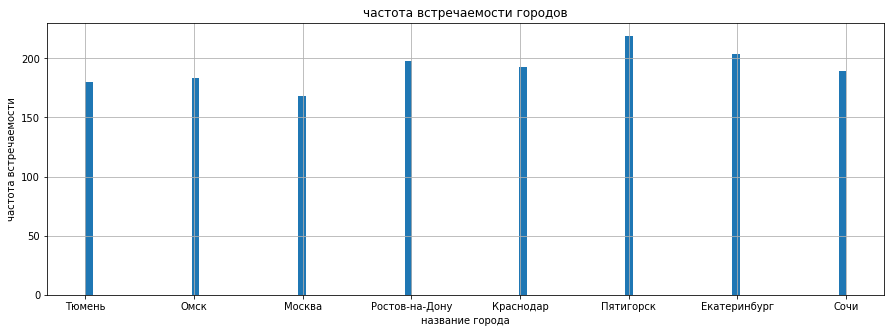

In [25]:
# как во всех предыдущих проектах, завожу функцию для отрисовки гистограммы,
# чтобы не указывать размер каждый раз
def draw_hist(dataset, col):
    dataset[col].hist(bins=100, figsize=(15,5))
draw_hist(users_go, 'city')
plt.title("частота встречаемости городов")
plt.xlabel("название города")
plt.ylabel("частота встречаемости")
plt.show()

In [26]:
# вижу, что городов немного, на всякий случай выведу ещё конкретные числовые значения 
print(users_go.groupby('city')['city'].count().sort_values(ascending = False))

city
Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64


**Вывод по полю:** самый часто встречающийся в данных город - Пятигорск. Оттуда больше всего самокатчиков. Удивительно, что заваленная самокатами Москва находится на последнем месте, а Санкт-Петербург в выборку вообще не попал. Возможно, это связано с тем, как ведёт бизнес данный сервис - возможно, в Петербург он ещё не пробрался, а в Москве только развивается. 

Изучим соотношение количества пользователей с подпиской и без подписки. Данные о типе подписки пользователя мы тоже можем почерпнуть из таблицы users_go.

In [27]:
# выведем информацию по количеству пользователей с подпиской и без
print(users_go.groupby('subscription_type')['subscription_type'].count().sort_values(ascending = False))

subscription_type
free     835
ultra    699
Name: subscription_type, dtype: int64


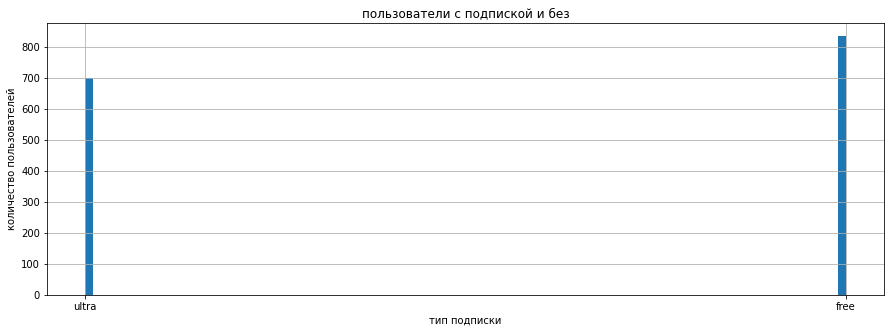

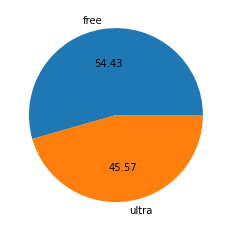

In [28]:
# выведем это гистограммой и красивым пайчартом 
draw_hist(users_go, 'subscription_type')
plt.title("пользователи с подпиской и без")
plt.xlabel("тип подписки")
plt.ylabel("количество пользователей")
plt.show()
# для пайчарта использую полученные ранее числа, поскольку типов подписки всего 2. Добавлю процент 
plt.pie([835, 699], labels = ['free', 'ultra'], autopct='%.2f')
plt.show()

**Обший вывод по полю**: сложно сказать, что пользователей с подпиской значительно больше, но разница в количестве пользователей с подпиской и без точно ощутимая. почти 55 процентов пользователей взаимодействуют с сервисом без подписки 

Изучим возраст пользователей. Делать мы это будем снова по таблице users_go

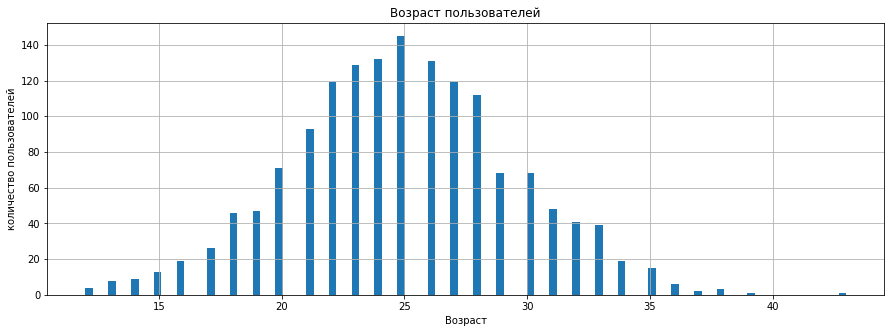

Количество несовершеннолетних пользователей -  79


In [29]:
draw_hist(users_go, 'age')
plt.title("Возраст пользователей")
plt.xlabel("Возраст")
plt.ylabel("количество пользователей")
plt.show()
print('Количество несовершеннолетних пользователей - ', len(users_go.query('age < 18')))

**Общий вывод по полю**: Самые часто встречающиеся в выборке клиенты сервиса - пользователи в возрасте около 25 лет. 
Дополнительно отметим, что, судя по данным, сервис позволяет пользоваться своими услугами несовершеннолетним или не требует обязательной верификации пользователей.   
Далее изучим расстояние, которое пользователь преодолел за одну поездку - делать это будем по таблице rides_go. 

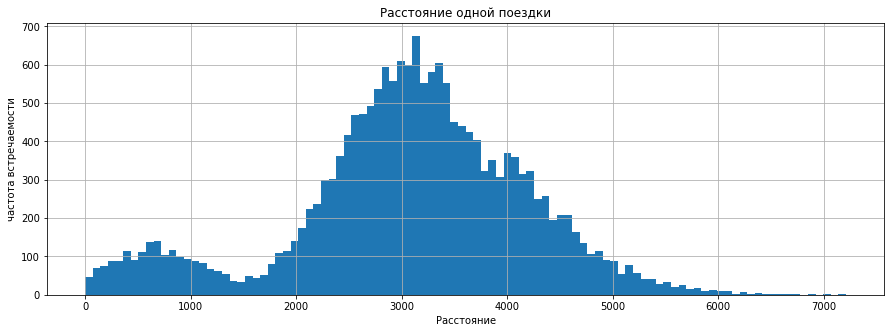

In [30]:
draw_hist(rides_go, 'distance')
plt.title("Расстояние одной поездки")
plt.xlabel("Расстояние")
plt.ylabel("частота встречаемости")
plt.show()

**Общий вывод по полю**: в основном пользователи совершают поездки на расстояние, близкое к 3 километрам. Также есть небольшой пик в распределении по расстоянию до километра - похоже, это может быть вызвано тем, что пользователи арендовали самокат просто попробовать покататься на коротком расстоянии, либо арендовали самокат и передумали, либо самокат оказался неисправен/разряжен, и пользователь не поехал.   
Изучим продолжительность поездок. 

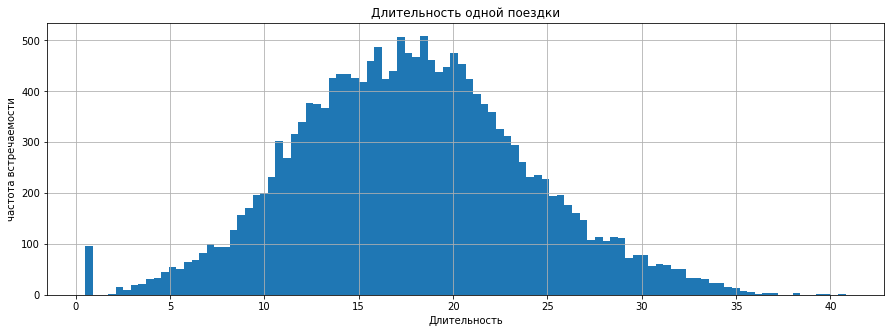

In [31]:
draw_hist(rides_go, 'duration')
plt.title("Длительность одной поездки")
plt.xlabel("Длительность")
plt.ylabel("частота встречаемости")
plt.show()

**Общий вывод по полю**: Чаще всего пользователи совершают поездки длиной 13-20 минут. Есть небольшой пик в районе нулевой длительности, он может быть связан с тем, что пользователь арендовал самокат, нашёл какую-то сложность с ним (разряжен, грязный, и тд) и отменил поездку. 

**Общий вывод по разделу**: Изучили тенденции в данных, обнаружили следующие закономерности: 
- Наибольшее количество пользователей находится в Пятигорске и Екатеринбурге. В Москве находится наименьшее количество пользователей.
- Пользователей без подписки больше, чем тех, кто платит за подписку на самокаты - почти 55% против 45% пользователей. 
- Средний возраст пользователей - в районе 25 лет 
- Сервисом пользуются несовершеннолетние 
- В основном пользователи проезжают на самокате около 3 километров 
- В основном поездка занимает 13-20 минут. 

#### Шаг 4. Объединение данных
В рамках данного раздела нам предстоит объединить данные в один датафрейм методом merge(), а затем разбить полученный датафрейм на 2 - по типу пользователей, с подпиской и без. В конце этапа визуализируем информацию о времени и расстоянии поездок для пользователей обеих категорий. 

In [32]:
# ещё раз выведем информацию о количестве строк в таблицах, которые собираемся объединить
display(rides_go.info())
display(users_go.info())
display(subscriptions_go.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

<font color=#3CB371>Видим 18068 строк в таблице поездок, 1534 пользователей и 2 строки в таблице с тарифами. Ожидаем, что при объединении количество строк в итоговом датасете будет равно максимальному количеству среди всех объединяемых таблиц, т.е. по количеству поездок. Это логично, в итоге мы должны получить информацию о поездках, и каждая поездка будет обогащена деталями о пользователе и его подписке, по сути денормализуем нашу маленькую базу данных.</font> 

In [33]:
# сначала соединим таблицы пользователей и поездок 
users_rides_go = users_go.merge(rides_go)
display(users_rides_go.head(5))
# проверим информацию о таблице, чтобы посмотреть как минимум количество строк
users_rides_go.info()
# теперь соединяем эту информацию с подписками 
data = users_rides_go.merge(subscriptions_go)
display(data.head(10))
data.info()

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(3)
memory usage: 1.4+ MB


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


<font color=#3CB371>Видим, что в итоговом датасете 18068 строк, то есть ровно тот размер, который мы и ожидали. И кроме того, в итоговом датасете присутствуют все колонки, которые были "разбросаны" до слияния по разным таблицам</font>

**Промежуточный итог**: объединили данные в общую таблицу, количество строк осталось равным количеству строк в информации о поездках, что было ожидаемо.   
А ещё Кира из Тюмени часто катается на самокате. 

Разобьём полученный датасет на два по типу подписки пользователя. 

In [34]:
data_ultra = data.query('subscription_type == "ultra"')
display(data_ultra.head(10))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


In [35]:
data_free = data.query('subscription_type == "free"')
display(data_free.head(10))

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
6505,700,Айдар,22,Омск,free,4342.002254,22.368009,2021-02-23,2,8,50,0
6506,700,Айдар,22,Омск,free,3798.334905,18.243756,2021-03-03,3,8,50,0
6507,700,Айдар,22,Омск,free,2984.551206,15.424899,2021-04-09,4,8,50,0
6508,700,Айдар,22,Омск,free,3360.107141,16.765497,2021-06-12,6,8,50,0
6509,700,Айдар,22,Омск,free,2567.543847,11.312160,2021-06-23,6,8,50,0


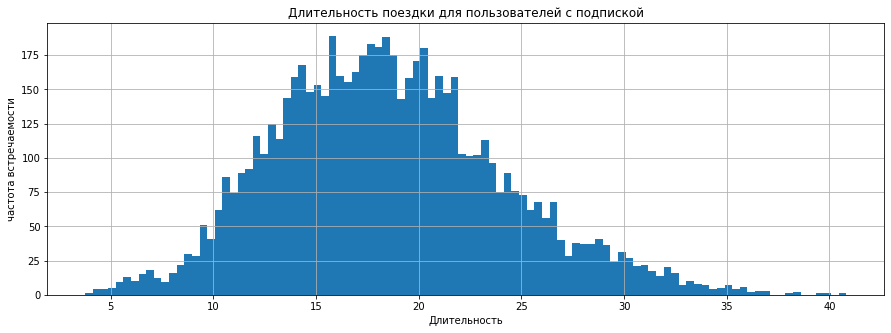

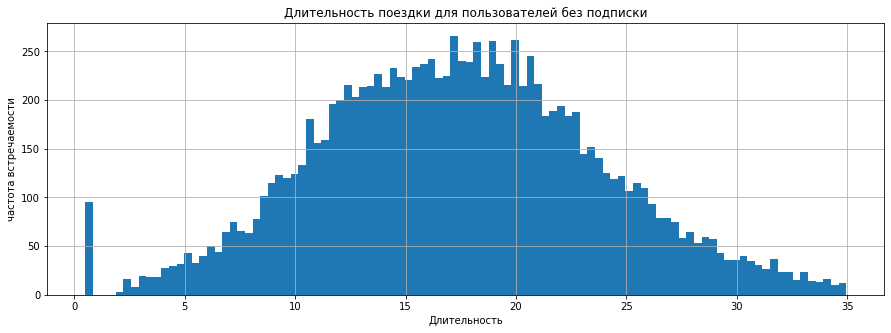

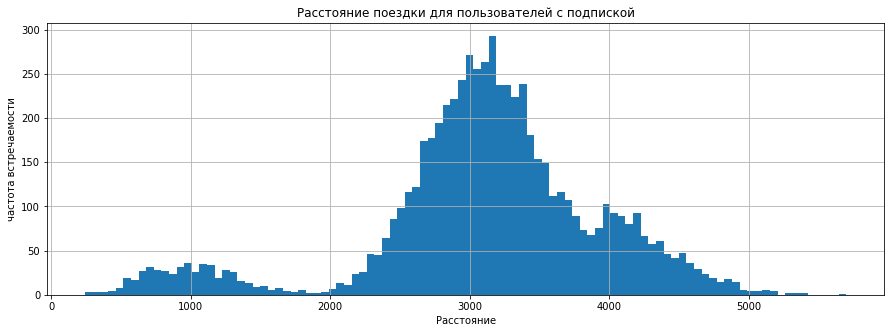

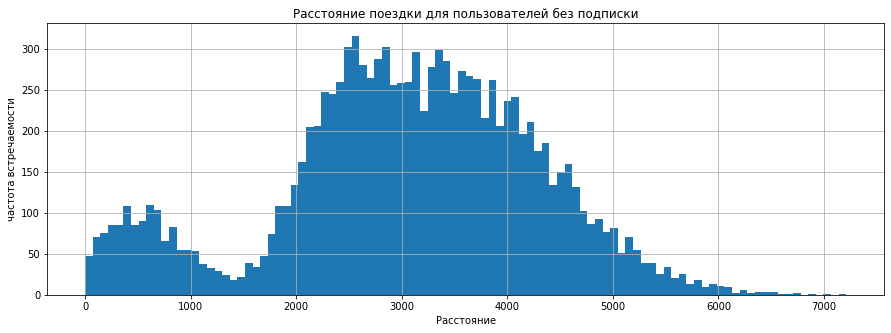

In [36]:
draw_hist(data_ultra, 'duration')
plt.title("Длительность поездки для пользователей с подпиской")
plt.xlabel("Длительность")
plt.ylabel("частота встречаемости")
plt.show()
draw_hist(data_free, 'duration')
plt.title("Длительность поездки для пользователей без подписки")
plt.xlabel("Длительность")
plt.ylabel("частота встречаемости")
plt.show()
draw_hist(data_ultra, 'distance')
plt.title("Расстояние поездки для пользователей с подпиской")
plt.xlabel("Расстояние")
plt.ylabel("частота встречаемости")
plt.show()
draw_hist(data_free, 'distance')
plt.title("Расстояние поездки для пользователей без подписки")
plt.xlabel("Расстояние")
plt.ylabel("частота встречаемости")
plt.show()

**Общий вывод**: Среднее время поездки составляет 15-20 минут для пользователей с подпиской и без подписки.   
Среднее расстояние поездки - 
- для пользователей с подпиской - около 3 километров 
- для пользователей без подписки чаще всего - 2.5 километра. 
Также можем увидеть, что для пользователей без подписки чаще встречаются очень короткие поездки, близкие по длительности к нулю - возможно, это может быть связано с более высокой стоимостью поездки для пользователей без подписки и с бОльшим количеством "случайных" пользователей, которые берут самокат "попробовать" и больше к этому не возвращаются.   

В среднем пользователи с подпиской за поездку проезжают бОльшее расстояние, чем пользователи без подписки. 


#### Шаг 5. Подсчёт выручки
В рамках данного этапа потребуется создать датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найти суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц, а затем добавить в этот датафрейм столбец с общей выручки с пользователя. 

<font color=#3CB371>Перед агрегацией данных округлим длительность поездки в минутах до целого числа с округлением в бОльшую сторону</font>

In [46]:
data['duration'] = np.ceil(data['duration'])
display(data['duration'].head(10))

0    26.0
1    16.0
2     7.0
3    19.0
4    27.0
5    17.0
6    15.0
7    24.0
8    16.0
9    16.0
Name: duration, dtype: float64

<font color=#3CB371>После округления переходим к объединению таблиц</font>

In [47]:
#создаю датафрейм с агрегированными данными. В index указываю не только user_id, но и месяц, поскольку 
# нужно разбить данные по месяцам. 
data_summary = data.pivot_table(index=['user_id', 'month'], values = ['distance', 'duration', 'name', 'subscription_type'], aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})
# сразу переименуем столбцы 
data_summary.columns = ['total_distance', 'total_duration', 'rides_count', 'subscription_type']
display(data_summary.head(10))

total_distance  total_duration  rides_count subscription_type
user_id month                                                               
1       1         7027.511294            42.0            2             ultra
        4          754.159807             7.0            1             ultra
        8         6723.470560            46.0            2             ultra
        10        5809.911100            32.0            2             ultra
        11        7003.499363            56.0            3             ultra
        12        6751.629942            28.0            2             ultra
2       3        10187.723006            63.0            3             ultra
        4         6164.381824            40.0            2             ultra
        6         3255.338202            14.0            1             ultra
        7         6780.722964            48.0            2             ultra

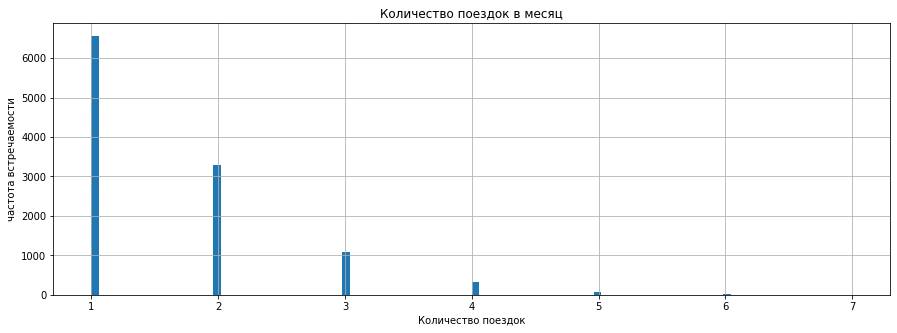

In [19]:
# выведем информацию о количестве поездок в собранных данных
draw_hist(data_summary, 'rides_count')
plt.title("Количество поездок в месяц")
plt.xlabel("Количество поездок")
plt.ylabel("частота встречаемости")
plt.show()

Здесь можно отметить, что по каждому пользователю мы видим только текущее состояние подписки. Возможно, та же Кира из Тюмени могла ездить в январе без подписки, а под конец года - с подпиской. Искать данные и пытаться их объединить будет неправильно (мы не знаем, сколько ещё Кир одинакового возраста из Тюмени пользуются сервисом). Возможно, сервису стоит задуматься над доработкой сервиса хранения данных и сохранять информацию об истории подписок пользователя, чтобы у нас было понимание, когда у пользователя была подписка.    

Далее добавим информацию с помесячной выручкой с каждого пользователя. Для этого объединим полученый удобный датасет с тарифами и получим размер выручки: 
- количество поездок в месяце умножим на стоимость старта 
- стоимость минуты умножим на длительность поездки 
- сложим полученные результаты и добавим к ним стоимость подписки (нулевую для пользователей без подписки)

In [24]:
revenue_data = data_summary.merge(subscriptions_go , on = 'subscription_type')
revenue_data['month'] = rides_go['date'].dt.month
revenue_data['income'] = (revenue_data['start_ride_price'] * revenue_data['rides_count']) + (revenue_data['minute_price'] * revenue_data['total_duration']) + revenue_data['subscription_fee']
# выведу данные для проверки, чтобы увидеть максимальную выручку за месяц с пользователя 
display(revenue_data.sort_values(by = 'income', ascending = False).head(10))

,total_distance,total_duration,rides_count,subscription_type,minute_price,start_ride_price,subscription_fee,month,income
10791,23098.193122,140.264426,6,free,8,50,0,1,1422.115405
7621,23429.487786,124.916782,7,free,8,50,0,3,1349.334253
4661,22712.450389,127.195642,6,free,8,50,0,11,1317.565134
10413,21527.849820,120.269714,7,free,8,50,0,7,1312.157715
10071,20653.334199,119.673964,6,free,8,50,0,12,1257.391711
8540,17991.776785,118.567466,6,free,8,50,0,7,1248.539731
6420,19061.395847,107.705211,6,free,8,50,0,10,1161.641689
8161,18449.375290,113.873896,5,free,8,50,0,8,1160.991170
6865,18244.387063,110.293073,5,free,8,50,0,3,1132.344581
8971,17670.402934,102.899348,6,free,8,50,0,4,1123.194784


**Общий вывод по разделу**: обработали датасет, добавили информацию об общей выручке с пользователя за месяц.    

Интересное наблюдение - в наш топ 10 по выручке за месяц попали только пользователи без подписки, у которх за месяц было 5-7 поездок. 

#### Шаг 6. Проверка гипотез
Проверим гипотезы для продакт менеджеров по порядку, начнём с первой. 
Тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу - отдельно для разных страт. 
Для этого мы уже создали отдельные датафреймы - data_ultra и data_free. 

**Нулевая гипотеза** будет говорить о равенстве - длительность поездки для пользователей с подпиской равна длительности поездки для "бесплатных" пользователей. **Альтернативная** - пользователи с подпиской ездят дольше. 

In [25]:
# возьмём информацию о длительности поездок из двух датасетов и запишем их в разные массивы 
distr_ultra = data_ultra['duration']
distr_free = data_free['duration']
# берём уровень значимости 0.05 
alpha = 0.05

results = st.ttest_ind(distr_ultra, distr_free, alternative = 'greater')
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
# выведем среднее
print('Среднее время поездки пользователей с подпиской:', data_ultra['duration'].mean())
print('Среднее время поездки пользователей без подписки:', data_free['duration'].mean())

p-value: 1.2804098316645618e-34
Отвергаем нулевую гипотезу
Среднее время поездки пользователей с подпиской: 18.54198516280583
Среднее время поездки пользователей без подписки: 17.39090929866399


**Общий вывод по гипотезе**: Гипотезу о равенстве среднего времени отвергаем, p-value очень маленький. И действительно, судя по среднему, пользователи с подпиской катаются дольше, чем пользователи без подписки. 

Переходим к следующей гипотезе. 
Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? 

В качестве **нулевой гипотезы** укажем равенство расстояния данному значению. **Альтернативная гипотеза** - пользователи проезжают за одну поездку в среднем более 3130 метров. 

Здесь берём только датасет с пользователями с подпиской, data_ultra, поскольку гипотеза включает только их. 

In [26]:
interested_value = 3130
alpha = 0.05
results = st.ttest_1samp(data_ultra['distance'], interested_value, alternative = 'greater')
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод по гипотезе**: Отвергнуть нулевую гипотезу не получилось, p-value не просто слишком велико, оно близко к единице. Значит, отвергнуть гипотезу о том, что в среднем "Платные" пользователи проезжают 3130 метров, нельзя.   

Переходим к следующей гипотезе:  будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  

**Нулевая гипотеза** - помесячная выручка от пользователей с подпиской равна помесячной выручке от пользователей без подписки. **Альтернативная** - выручка с "платных" пользователей выше, чем с "бесплатных". 

Помесячную выручку мы добавляли в датасет revenue_data, общий для разных пользователей, будем работать с ним, отфильтровав данные, чтобы сравнить два массива. 

In [27]:
revenue_free = revenue_data.query('subscription_type == "free"')['income']
revenue_ultra = revenue_data.query('subscription_type == "ultra"')['income']
# берём уровень значимости 0.05 
alpha = 0.05

results = st.ttest_ind(revenue_ultra, revenue_free, alternative = 'greater')
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
# выведем среднее
print('Средний доход в месяц от пользователей с подпиской:', revenue_ultra.mean())
print('Среднее доход в месяц от пользователей без подписки:', revenue_free.mean())

p-value: 2.899911210580282e-37
Отвергаем нулевую гипотезу
Средний доход в месяц от пользователей с подпиской: 358.52733760190324
Среднее доход в месяц от пользователей без подписки: 321.8335260570109


**Вывод по гипотезе**: Нулевую гипотезу отвергли. Действительно, можно считать, что в среднем пользователи с подпиской приносят больше дохода, чем пользователи без подписки.   

Переходим к следующей гипотезе, она теоретическая. 
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

В данном случае мы сравниваем зависимые наборы данных - это обращения конкретных пользователей до и после обновления. Соответственно в качестве нулевой гипотезы скажем, что количество обращений не изменилось, а в качестве альтернативной  гипотезы - количество обращений снизилось. Т.е. используем метод 

> st.ttest_rel (массив до обращения, массив после обращения, alternative = 'less') 

# Общий вывод 
В рамках данного проекта были проанализированы данные о поездках пользователей из разных городов на самокатах сервиса Go. 

Были загружены и проанализированы исходные данные, устранены явные дубликаты, столбец date приведён к более удобному виду. Визуализирована информация об основных полях набора, построены графики. Были выявлены следующие тенденции: 
- больше всего пользователей в Пятигорске 
- пользователей без подписки несколько больше - почти 55 процентов против 45 
- средний возраст пользователей - около 25 лет 
- среднее расстояние поездки - около 3 километров 
- средняя длительность поездки - 15-20 мминут. 

Далее были проведены преобразования в данныз для более удобных подсчётов, выявлен доход с каждого пользователя в разрезе по месяцам, а также исследованы длительность и дальность поездок для пользователей с подпиской и без подписки. 

Были проверены гипотезы продакт менеджеров, общий вывод по которым таков: 
- пользователи с подпиской  в среднем ездят дольше, чем пользователи без подписки. 
- пользователи с подпиской проезжают за поездку в среднем примерно 3130 метров, что является оптимальным для износа самокатов  
- пользователи с подпиской приносят в среднем больший доход, чем пользователи без подписки.

А ещё сервис самокатов позволяет пользоваться им несовершеннолетним. 